<a href="https://colab.research.google.com/github/github-ashwin/DeepLearning-Lab/blob/main/VGG16_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import InputLayer,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [60]:
x_train.shape

(50000, 32, 32, 3)

In [61]:
x_train.shape

(50000, 32, 32, 3)

In [62]:
y_train.shape

(50000, 1)

In [63]:
# img_rows = 28
# img_cols = 28
# x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
# x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [64]:
x_train = x_train/255.0
x_test = x_test/255.0

In [65]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [66]:
x_train.shape

(50000, 32, 32, 3)

In [67]:
y_train.shape

(50000, 10)

In [68]:
vgg_model = VGG16(weights='imagenet',include_top=False)

In [69]:
for layer in vgg_model.layers:
    layer.trainable = False

In [70]:
input_size = (32,32,3)
model = Sequential()
model.add(InputLayer(shape=input_size))
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [71]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.1),metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [73]:
datagen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)

In [74]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=64),epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.1068 - loss: 3.1163 - val_accuracy: 0.1000 - val_loss: 2.3090
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.1017 - loss: 2.3493 - val_accuracy: 0.1000 - val_loss: 2.3052
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.1025 - loss: 2.3098 - val_accuracy: 0.1000 - val_loss: 2.3161
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.1005 - loss: 2.3120 - val_accuracy: 0.1000 - val_loss: 2.3071
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1009 - loss: 2.3140 - val_accuracy: 0.1000 - val_loss: 2.3116
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.0987 - loss: 2.3123 - val_accuracy: 0.1000 - val_loss: 2.3133
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.0998 - loss: 2.3123 - val_accuracy: 0.1000 - val_loss: 2.3129
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.0985 - loss: 2.3111 - val_accurac

In [75]:
test_acc,test_loss = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1027 - loss: 2.3147


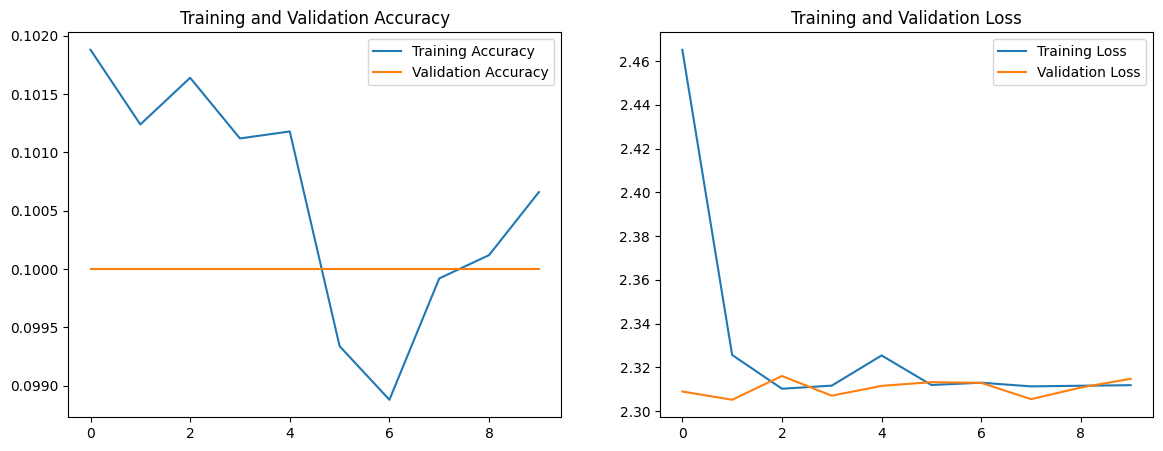

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

plt.show()